<a href="https://colab.research.google.com/github/alfina33/Sentiment-Analysis/blob/main/Final_Project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Module



In [27]:
import warnings; warnings.simplefilter('ignore')
!pip install Sastrawi
!pip install textblob
!pip install wget
!pip install tqdm
!pip install unidecode

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e31212e0f32a4ab6ebdc91158294a49c2410cb5a08f0aa5d96843eff4308c845
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


# Import Module

In [44]:
import pandas as pd
import random
import re
import nltk
import torch
import requests
import json
import Sastrawi
import urllib.request
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from html import unescape
from sklearn import svm
from sklearn.svm import SVC
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from textblob import TextBlob
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
random.seed(7)

In [29]:
# Loading Data
try:
    data1 = pd.read_csv('data/data-sentimen/dataset_komentar_instagram_cyberbullying.csv')
    data2 = pd.read_csv('data/data-sentimen/dataset_tweet_sentimen_tayangan_tv.csv')
    data3 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_cellular_service_provider.csv')
    data4 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_opini_film.csv')
    data5 = pd.read_csv('data/data-sentimen/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
    print("Loaded from local file.")
except:
    data1 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_komentar_instagram_cyberbullying.csv')
    data2 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentimen_tayangan_tv.csv')
    data3 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_cellular_service_provider.csv')
    data4 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_opini_film.csv')
    data5 = pd.read_csv('https://raw.githubusercontent.com/wiweka24/NLP_Sentiment-Analysis/main/Dataset-Sentimen-Analisis-Bahasa-Indonesia/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
    print("Loaded from Github.")

Loaded from Github.


In [31]:
data1 = data1.drop(columns=['Id']).rename(columns={'Instagram Comment Text':'Content'})
data2 = data2.drop(columns=['Id','Acara TV','Jumlah Retweet']).rename(columns={'Text Tweet':'Content'})
data3 = data3.drop(columns=['Id']).rename(columns={'Text Tweet':'Content'})
data4 = data4.drop(columns=['Id']).rename(columns={'Text Tweet':'Content'})
data5 = data5.drop(columns=['Id','Pasangan Calon']).rename(columns={'Text Tweet':'Content'})

df = pd.concat([data1,data2,data3,data4,data5], ignore_index=True)
df.head()

,Sentiment,Content
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [33]:
df["Content"]

0        <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1       Geblek lo tata...cowo bgt dibela2in balikan......
2       Kmrn termewek2 skr lengket lg duhhh kok labil ...
3       Intinya kalau kesel dengan ATT nya, gausah ke ...
4       hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...
                              ...                        
2195    Kali saja bpk @aniesbaswedan @sandiuno lihat, ...
2196    Kita harus dapat merangkul semua orang tanpa b...
2197    Ini jagoanku dibidang digital <Smiling Face Wi...
2198                 #PesanBijak #OkeOce #GubernurGu3 ...
2199    Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...
Name: Content, Length: 2200, dtype: object

In [ ]:
hashtags = []
for tweet in data['Tweet']:
    hashtag_list = re.findall(r'#\w+', tweet)
    hashtags.extend(hashtag_list)

# Banyaknya hashtag per setiap hashtag
hashtag_counts = pd.Series(hashtags).value_counts()
hashtag_counts

#AHY                        160
#AhokDjarot                 153
#AniesSandi                 122
#pilkadadki2017              99
#kickandy                    50
                           ... 
#RakernasDemokrat2017         1
#partaidemokrat               1
#lombok                       1
#gilitrawangan                1
#AniesSandiJawaraJakarta      1
Length: 769, dtype: int64

In [ ]:
len(hashtags)

2219

In [ ]:
top_10_hashtags = hashtag_counts.head(10)
print(top_10_hashtags)

Top 10 Hashtags:
#AHY               160
#AhokDjarot        153
#AniesSandi        122
#pilkadadki2017     99
#kickandy           50
#PilkadaDKI         46
#ahokdjarot         45
#PilkadaDKI2017     39
#Ahok               36
#ILC                32
dtype: int64


# Mengecek dan menangani Duplikasi

In [34]:
df[df.duplicated()==True]

,Sentiment,Content
57,negative,"<USERNAME> ini lagi pemikiran manusia bodoh, ..."
71,negative,<USERNAME> bisa nya cuma ngatain org . Nyindi...
94,negative,Dasar artis abal abal enggk laku di layar kaca...
971,positive,Terimakasih ya <PROVIDER_NAME> gratis 4Gnya ay...
1053,negative,Jaringan internet <PROVIDER_NAME> di sumba tim...
1255,positive,"pokoknya kalian harus nonton film kartini, asl..."
1280,positive,nah ini. coba nonton filmnya deh. asik parah
1426,negative,ahoker masih bully #AHY
2038,negative,"Setelah KO di beberapa Polling, kini mereka go..."


In [35]:
# cek duplikasi
print(df.duplicated().sum())

# membuang duplikasi
df.drop_duplicates(inplace=True)
print(df.shape)

9
(2191, 2)


# Melakukan Sampling


In [61]:
# Menghitung jumlah contoh dalam masing-masing kelas
class_counts = df['Sentiment'].value_counts()
class_counts

negative    1105
positive    1086
Name: Sentiment, dtype: int64

In [63]:
# menyeimbangkan kelas
min_samples = 1086

df_pos = df[df['Sentiment']=='positive'].sample(min_samples, random_state=7)
df_neg = df[df['Sentiment']=='negative'].sample(min_samples, random_state=7)

df = pd.concat([df_pos, df_neg], axis=0)

# memeriksa hasil undersampling
df.Sentiment.value_counts()

positive    1086
negative    1086
Name: Sentiment, dtype: int64

# Preprocessing


In [64]:
# import slang
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/slang.dic'
response = urllib.request.urlopen(url)
slang_id = eval(response.read())

print("jumlah slang: ", len(slang_id))

jumlah slang:  1629


In [65]:
# jika ada slang yang belum tertangani
slang_tambahan = {
    '': '',
    '': '',
    '': '',
    '': '',
    '': ''
}
slang_id.update(slang_tambahan)

print("jumlah slang : ", len(slang_id))

jumlah slang :  1630


In [66]:
# import stopword
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/stopwords_id.txt'
response = urllib.request.urlopen(url)
stopword_id = response.read().decode('utf-8').split('\n')

print("jumlah stopword: ", len(stopword_id))

jumlah stopword:  758


In [67]:
# bisa ditambahkan jika ada stopword yang belum tertangani
stopword_tambahan = set(['a',
                         'b',
                         'c',
                         'd',
                         'e',
                         'f',
                         'g',
                         'h',
                         'i',
                         'j',
                         'k',
                         'l',
                         'm',
                         'n', 'name',
                         'o',
                         'p', 'provider',
                         'q',
                         'r',
                         's',
                         't',
                         'u', 'username',
                         'v',
                         'w',
                         'x',
                         'y',
                         'z',])
stopword_id = set(stopword_id).union(stopword_tambahan)

print("jumlah stopword: ", len(stopword_id))

jumlah stopword:  786


In [68]:
# data cleaning
def cleaning_text(text):
  # menghapus url
  url_pattern = re.compile(r'(\w+:\/\/\S+)')
  text = url_pattern.sub(' ', text)
  # menghapus hashtag
  hashtag_pattern = re.compile(r'#\w+\b')
  text = hashtag_pattern.sub(' ', text)
  # menghapus nama pengguna instagram (memuat "@")
  username_pattern = re.compile(r'@\w+\b\s*')
  text = username_pattern.sub(' ', text)
  # menghapus angka
  text = re.sub(r'\b\d+\b|[^\w\s]', '', text)
  # mengahpus simbol
  symbol_pattern = re.compile(r'[^\w\s]+')
  text = symbol_pattern.sub(' ', text)
  # menghapus karakter yang tidak diperlukan (tergantung media sosial)
  text = re.sub(r'\n', ' ', text)
  text = re.sub(r'\r', ' ', text)
  text = re.sub(r'&\w+', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  # menangani huruf kapital dan spasi
  text = unidecode(unescape(text.lower().strip()))
  return text

def remove_stopword(text):
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w in stopword_id]
  return ' '.join(filtered_sentence)

def stemming_and_lemmatization(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  return stemmer.stem(text)

def remove_slang(text):
  text = ''.join(slang_id[p] if p in slang_id else p for p in re.split(r'(\W+)', text))
  return text

def preprocess(text):
  # cleaning text and lowercase
  output = cleaning_text(text)
  # remove slang
  output = remove_slang(output)
  # stemming and lemmatization
  output = stemming_and_lemmatization(output)
  # remove stopwords
  output = remove_stopword(output)

  return output
"done"

'done'

In [69]:
df['clean_text'] = ''
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_text'] = preprocess(post.Content)

2172it [17:02,  2.12it/s]


In [70]:
teks_bersih = df['clean_text'].copy()
teks_bersih[0]

'tolol hubung nya gugur pakai hijab syar bilang bayi nya panas dalem hubung nya woyyyy otak jempol singkron sih iya nulis komentar'

In [ ]:
teks_bersih

0       tolol tidak hubung nya gugur dengan pakai hija...
1       geblek kamu tata cowo banget dibela2in balik h...
2       kemarin termewek2 skr lengket lagi duhhh labil...
3       inti kesel att nya gausah anak kasi kembang ps...
4       hadewwwww permpuan lagi sakit jiwa kenapa yang...
                              ...                        
2195                kali bapak lihat rspun selfie ok hand
2196    rangkul orang batas usia kelamin ok hand menan...
2197    jago bidang digital smiling face with sunglass...
2198                                                     
2199    sandiaga bangun rumah dp 0 simpel banding tol ...
Name: clean_text, Length: 2191, dtype: object

# WordCloud

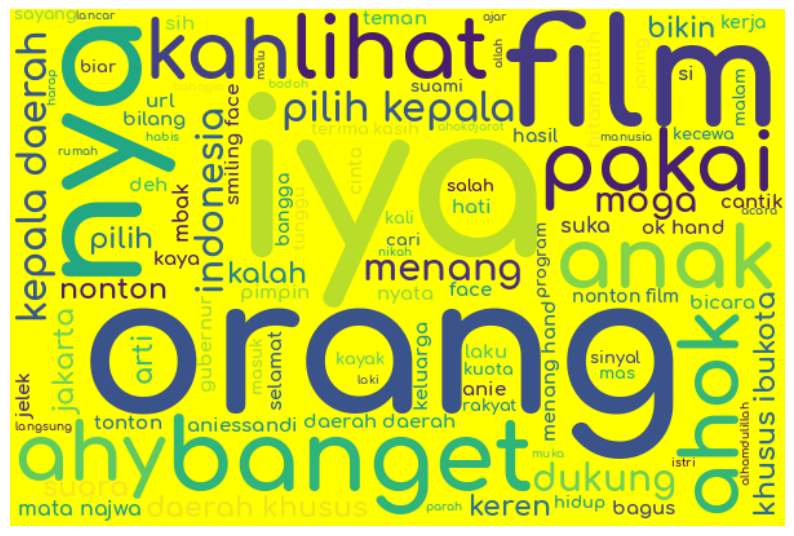

In [72]:
allWords = ' '.join( [t for t in df['clean_text']] )
font = '/content/Comfortaa-Bold.ttf'
wordCloud = WordCloud(background_color = "yellow",
                      font_path = font,
                      width = 600,
                      height = 400,
                      max_words = 100,
                      colormap = 'viridis').generate(allWords)
plt.figure(figsize = (10,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# N-Gram

In [73]:
def tokenization(df):
    texts = df['clean_text']
    tokens = [token for text in texts for token in text.split()]
    return tokens

In [74]:
ngram = tokenization(df)
ngram[:8]

['buka', 'puasa', 'streaming', 'youtube', 'lancar', 'banget', 'pakai', 'setia']

In [75]:
(pd.Series(nltk.ngrams(ngram, 2)).value_counts())[:10]

(face, with)         95
(pilih, kepala)      86
(kepala, daerah)     86
(daerah, khusus)     76
(khusus, ibukota)    76
(mata, najwa)        58
(daerah, daerah)     49
(ok, hand)           43
(smiling, face)      41
(menang, hand)       41
dtype: int64

In [77]:
bigrams_series = (pd.Series(nltk.ngrams(ngram, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(ngram, 3)).value_counts())[:15]

Text(0.5, 0, '# of Occurances')

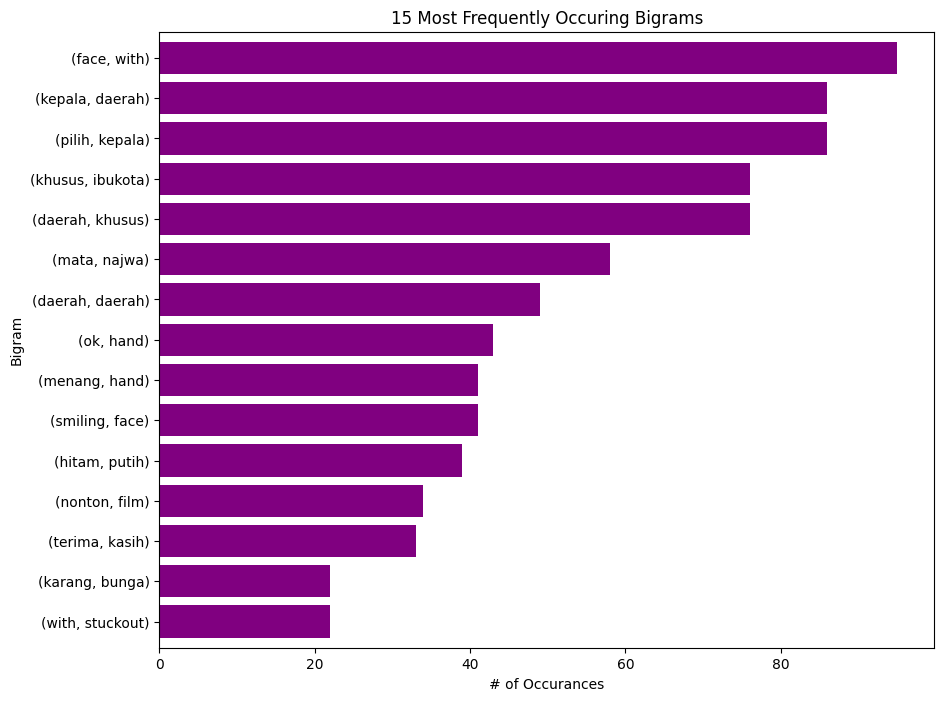

In [87]:
ax = bigrams_series.sort_values().plot.barh(color='purple', width=.8, figsize=(10, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

#Support Vector Machine

In [79]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline

In [82]:
# ketentuan: 30% test, 70% train
x = df['Content']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

print(x_train.shape, x_test.shape)

(1520,) (652,)


In [83]:
# Cross Validasi
# Menentukan optimal parameter SVM dengan RandomSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'verbose']


In [84]:
# Optimal parameter SVM dengan RandomizedSearch

seed = 99
kCV = 5
metric = 'accuracy'
paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

randsvmCV = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randsvmCV.fit(x_train, y_train)
print(randsvmCV.best_score_)
print(randsvmCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.7743421052631578
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 3), 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__max_df': 0.75, 'svc__kernel': 'rbf', 'svc__gamma': 1.0, 'svc__decision_function_shape': 'ovr', 'svc__C': 10}


In [85]:
# Melakukan vektorisasi menggunakan TF-IDF
vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, ngram_range=(1, 3), max_df=0.75, min_df=5)
x_train_vectorized = vsm.fit_transform(x_train)
x_test_vect = vsm.transform(x_test)

print(x_train_vectorized.shape, x_test_vect.shape) # Jumlah kolom Sama ==> ini penting

(1520, 996) (652, 996)


In [86]:
from sklearn import svm

dSVM = svm.SVC()
dSVM.fit(x_train_vectorized, y_train)
y_SVM = dSVM.predict(x_test_vect)

print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.7515337423312883
[[255  71]
 [ 91 235]]
              precision    recall  f1-score   support

    negative       0.74      0.78      0.76       326
    positive       0.77      0.72      0.74       326

    accuracy                           0.75       652
   macro avg       0.75      0.75      0.75       652
weighted avg       0.75      0.75      0.75       652



In [96]:
# confusion matrix untuk evaluasi kerja model; membandingkan hasil prediksi dengan nilai sebenarnya
cm = confusion_matrix(y_test, y_SVM)
cm

array([[255,  71],
       [ 91, 235]])

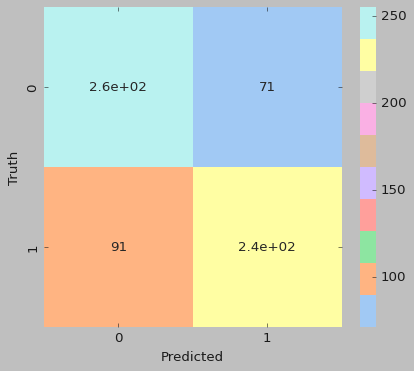

In [99]:
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap=colors)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


# WordClouds

In [104]:
# Menggabungkan teks berdasarkan hasil prediksi
text_positive = " ".join(x_test[y_SVM == 'positive'])  # Menggabungkan teks dengan hasil prediksi positif
text_negative = " ".join(x_test[y_SVM == 'negative'])  # Menggabungkan teks dengan hasil prediksi negatif

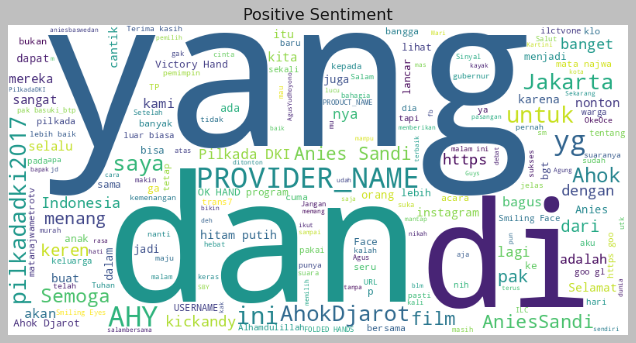

In [106]:
# Membuat objek WordCloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(text_positive)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment')
plt.show()


In [111]:
def wordcloud(result, sentiment, emotion, tweet): # nyari bedanya gmn
  result_data = result.loc[result[sentiment] == emotion]
  result_data

  allWords  = ' '.join( [str (twts) for twts in result_data[tweet]])
  font = '/content/Comfortaa-Bold.ttf'
  wordCloud = WordCloud(background_color = "yellow",
                        font_path = font,
                        width = 600,
                        height = 400,
                        max_words = 50,
                        colormap = 'viridis').generate(allWords)
  plt.figure(figsize = (10,10))
  plt.imshow(wordCloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

In [1]:
wordcloud(df, 'Sentiment', 'positive', 'clean_text')

NameError: ignored

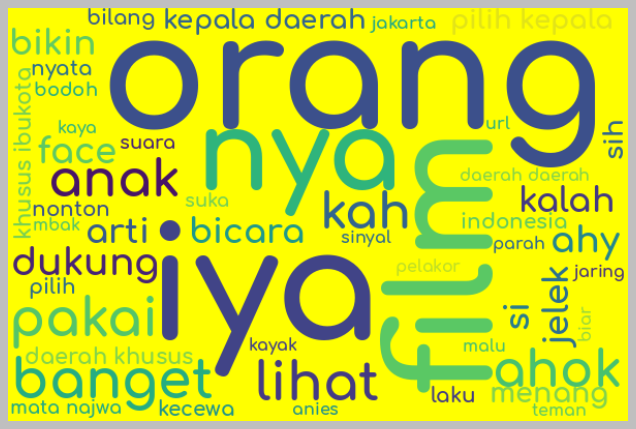

In [113]:
wordcloud(df, 'Sentiment', 'negative', 'clean_text')

In [116]:
!pip install imageio

In [117]:
import imageio
from wordcloud import WordCloud, STOPWORDS
text = " ".join(x_test)

# Membaca gambar mask lambang Twitter
twitter_mask = np.array(imageio.imread("twitter_mask.jpg"))

# Membuat objek WordCloud dengan mask lambang Twitter
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=twitter_mask, stopwords=STOPWORDS).generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

FileNotFoundError: ignored

# N-Gram

In [ ]:
def tokenization(df):
    texts = df['pos_text']
    tokens = [token for text in texts for token in text.split()]
    return tokens

In [ ]:
ngram = tokenization(df)
ngram[:5]

In [ ]:
(pd.Series(nltk.ngrams(ngram, 1)).value_counts())[50:70]

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(ngram, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(ngram, 3)).value_counts())[:12]

In [ ]:
ax = bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('12 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Barplot banyaknya sentimen negatif dan positif

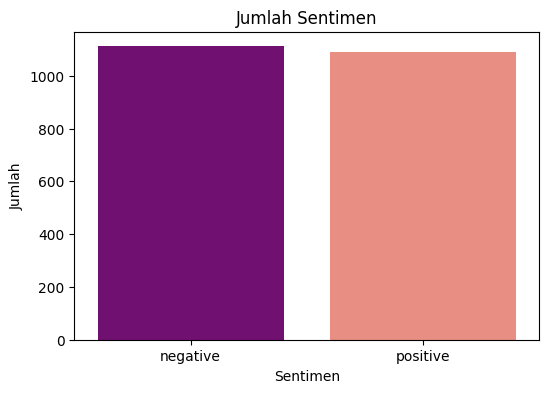

In [ ]:
sentiment_counts = preprocessed_data['Sentiment'].value_counts()
colors = ['purple', 'salmon']
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title("Jumlah Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


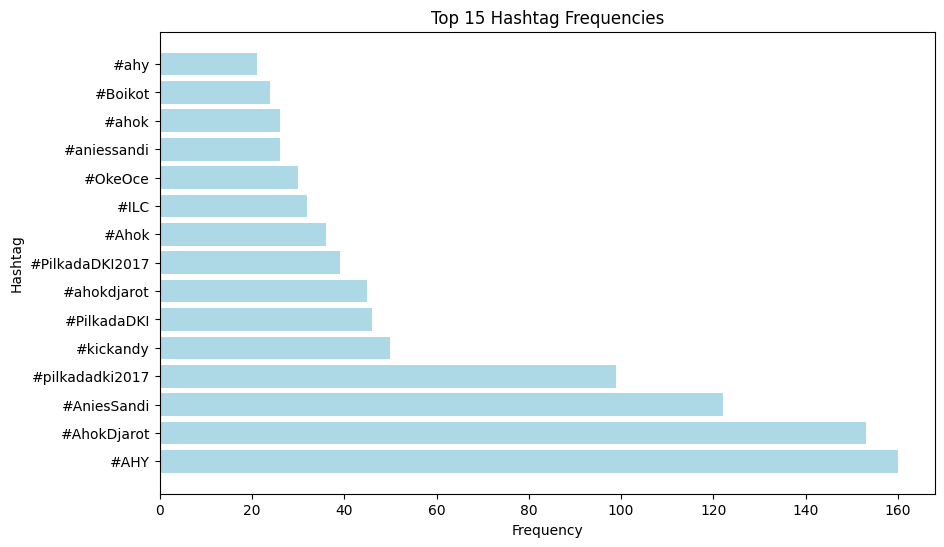

In [ ]:
n = 15  # Number of top frequent hashtags to be plotted
top_n_hashtags = hashtag_counts.head(n)

# bar chart hashtag
plt.figure(figsize=(10, 6))
plt.barh(top_n_hashtags.index, top_n_hashtags.values, color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.title(f'Top {n} Hashtag Frequencies')
plt.show()

# Performa Model SVM

In [ ]:
# Evaluasi performa model
classification_result = classification_report(y_test, y_pred)
classification_result

In [ ]:
# sama aja
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')